1. Web Scraping with BeautifulSoup - Scrape the titles and prices of the first
10 books listed on https://books.toscrape.com.
• Use requests and BeautifulSoup.
• Extract and print book title and price.
• Save results to a CSV file.

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [3]:
url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
books = soup.find_all('article', class_='product_pod')

In [7]:
book_data = []

In [9]:
for book in books[:10]:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_data.append([title, price])
    print(f"Title: {title}, Price: {price}")

Title: A Light in the Attic, Price: Â£51.77
Title: Tipping the Velvet, Price: Â£53.74
Title: Soumission, Price: Â£50.10
Title: Sharp Objects, Price: Â£47.82
Title: Sapiens: A Brief History of Humankind, Price: Â£54.23
Title: The Requiem Red, Price: Â£22.65
Title: The Dirty Little Secrets of Getting Your Dream Job, Price: Â£33.34
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull, Price: Â£17.93
Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics, Price: Â£22.60
Title: The Black Maria, Price: Â£52.15


In [11]:
csv_filename = 'books.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price'])
    writer.writerows(book_data)

In [13]:
print(f"\nData saved to {csv_filename}")


Data saved to books.csv


Q2: API-Based News Collection - Use the NewsAPI to collect the top 10
headlines related to "Technology" in India.
• Use the requests library.
• Extract title, source, and publication date.
• Save the results in JSON format.

In [15]:
import requests
import json

In [29]:
api_key = 'e62cc84c3386400189d1a068d7c6f1ed'  
url = ('https://newsapi.org/v2/top-headlines?'
       'category=technology&'
       'country=in&'
       'pageSize=10&'
       f'apiKey={api_key}')

In [31]:
response = requests.get(url)

In [35]:
if response.status_code == 200:
    data = response.json()
    articles = data['articles']

    results = []
    for article in articles:
        info = {
            'title': article['title'],
            'source': article['source']['name'],
            'publishedAt': article['publishedAt']
        }
        results.append(info)
        print(f"Title: {info['title']}\nSource: {info['source']}\nPublished At: {info['publishedAt']}\n")
    with open('technology_news_india.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=4)

    print("News data saved to 'technology_news_india.json'")
else:
    print(f"Failed to fetch news. Status Code: {response.status_code}")

News data saved to 'technology_news_india.json'


Q3: Weather Data Collection (OpenWeather API) - Fetch the current weather for
5 Indian cities using OpenWeatherMap API.
• Collect temperature, humidity, and weather condition.
• Present results in a Pandas DataFrame.
• Plot a bar chart of temperatures using matplotlib.

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
api_key = '0af8551aa4485e6cc428ce2ded74c849'

In [71]:
cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bangalore']

In [73]:
base_url = 'https://api.openweathermap.org/data/2.5/weather'

In [75]:
weather_data = []

In [81]:
for city in cities:
    try:
        params = {
            'q': city,
            'appid': api_key,
            'units': 'metric'
        }
        response = requests.get(url, params=params)
        response.raise_for_status()

        data = response.json()

        city_name = data['name']
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        condition = data['weather'][0]['description']

        weather_data.append({
            'City': city_name,
            'Temperature (°C)': temp,
            'Humidity (%)': humidity,
            'Condition': condition.title()
        })

    except:
       print(f"Error fetching data ")

# Create DataFrame
df = pd.DataFrame(weather_data)
print("\nWeather Data:")
print(df)


Weather Data:
       City  Temperature (°C)  Humidity (%)        Condition
0     Delhi             33.10            62    Broken Clouds
1       Leh             15.29            52    Broken Clouds
2  Srinagar             21.35            77    Broken Clouds
3     Jammu             31.53            60    Broken Clouds
4    Punjab             37.27            42  Overcast Clouds


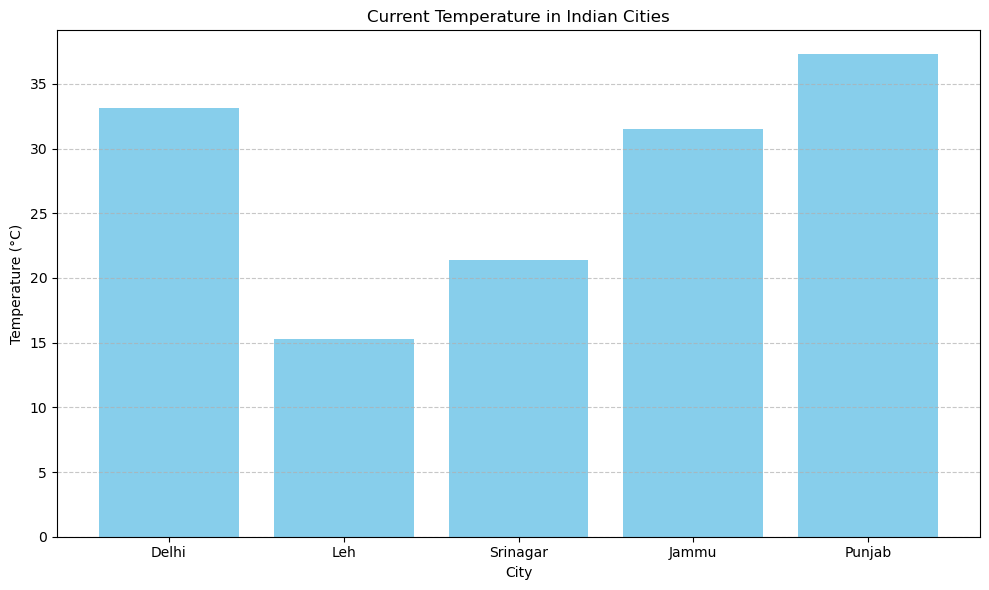

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Temperature (°C)'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title('Current Temperature in Indian Cities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()